<a href="https://colab.research.google.com/github/bandpooja/AI_based_projects/blob/main/Startup_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Supervised ML-Algorithms

### PART - 2

</center>

In this notebook we will be learning basic implementation of **Linear Models** (**Logistic regression**, **Multiclass Logistic Regression**, **Linear Regression** and **Polynomial Regression**) algorithms, on a randomly prepared dataset. 

We will start by importing the modules necessay for this implementation.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

## Classification

We will first implement these algorithms for a classification task on a randomly generated dataset. Uisng making blobs to generate a randomly spread dataset around different clusters.

For this example we have **two** randomly selected cluster centers and the points are spread around it with some standard deviation so that there is some overlap between the points. We are using a **1-D** sample point **x**, just because things are easy to visualize in 1-dimensions. 

**Logistic Regression** is an algorithm defined for binary classification which can be extended to a multiclass classification problem. The model basically predicts **probability** of a point of a point belonging to a class.

In [2]:
# generating the dataset
x, y= make_blobs(n_samples=1000, n_features=2,
                 centers=[(1, 1), (0,0)],
                 cluster_std=0.5)

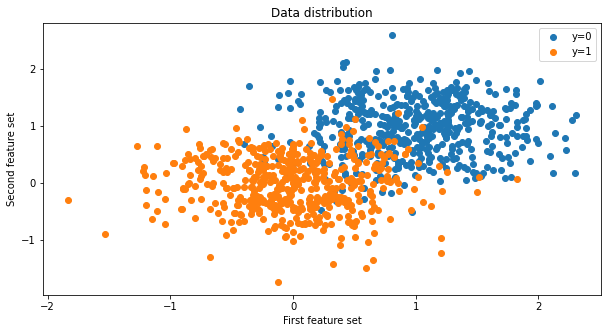

In [3]:
# visualizing the dataset
plt.figure(figsize=(10, 5))
ys = np.unique(y)
for y_ in ys:
  ix_ = np.where(y==y_)
  plt.scatter(x[ix_, 0], x[ix_, 1], label=f'y={y_}')
plt.legend()
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Data distribution')
plt.show()

Splitting the data in **train**, **validation** and **test** set

Using **train** to *fit* the model and using **validation** to *tune the hyperparameters* and then making the *final generalization analysis* on the **test** set.

In [4]:
# splitting 80% of data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# splitting the rest 20% into 10% for validation and 10% for test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

### Logistic Regression

In **logistic regression** the main *hyperpaprameter* that we want to tune is **penalty**(regulerization to be used, not needed since we have *only one coefficient*, very useful to ignore non-helpful features and avoide overfitting) to consider for the test point's label. 

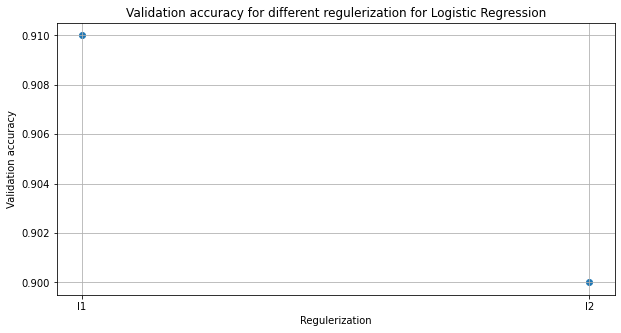

In [5]:
'''
 we two regulerization that we usually use L1 and L2. We also have elastic net
 which uses a combination of both the regulerizations. Solver is another parameter
 for Logistic Regrssion problems (it refers to optimization algorithm to be used) 
 - 'newton-cg', 'lbfgs' and 'sag' can only handle L2-regulerization or no penalty
 - 'liblinear' and ‘saga’ also handle L1 penalty
 - 'liblinear' cant handle none penalty
'''

regulerization_ = ['l1', 'l2']
val_score = []

for reg_ in regulerization_:
  model = LogisticRegression(penalty=reg_, solver='liblinear')
  model.fit(x_train, y_train)
  val_score.append(model.score(x_val, y_val))

plt.figure(figsize=(10, 5))
plt.scatter([0, 1], val_score)
plt.grid()
plt.xticks(ticks=[0,1], labels=regulerization_)
plt.xlabel('Regulerization')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy for different regulerization for Logistic Regression')
plt.show()

We have the same validation accuracy for both the regulerization, therefore we can use either one of them for the model and seeing its performance on the test set.

In [6]:
binary_cls_model = LogisticRegression(solver='liblinear', penalty='l2')
binary_cls_model.fit(x_train, y_train)

print(f'Training accuracy-score of the model {binary_cls_model.score(x_train, y_train)}')
print(f'Test accuracy-score of the model {binary_cls_model.score(x_test, y_test)}')

Training accuracy-score of the model 0.9125
Test accuracy-score of the model 0.95


Lets plot the confusion matrix of the final logistic regression model.

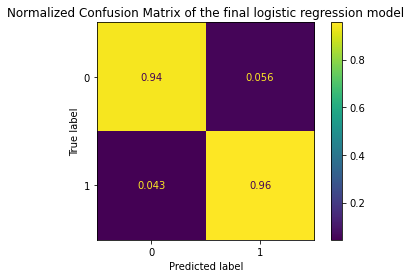

In [7]:
plot_confusion_matrix(binary_cls_model, x_test, y_test, normalize='true')
plt.title('Normalized Confusion Matrix of the final logistic regression model')
plt.show()

Ahann!! our **Logistic Regrssion** is **95%** aacuarate. Lets wrap this up by plotting the decision boundary of the *logistic-regression model*.

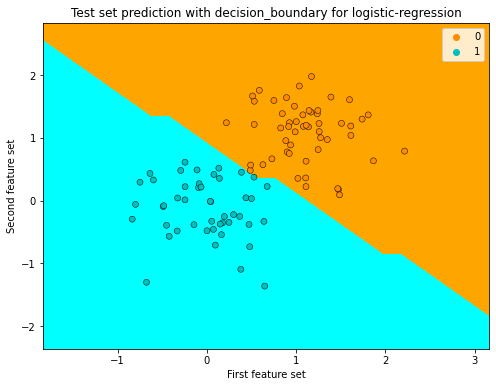

In [8]:
# defining a mesh a predicting on each step in the mesh 

h = 0.2 # step size for mesh grid points
# color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = binary_cls_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=binary_cls_model.predict(x_test),
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Binary classification logistic regression")
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Test set prediction with decision_boundary for logistic-regression')
plt.show()

Its clear from the decision boundary as to why this model is trying to do and hence it gets it name **Logistic Regression**.

Defining data for multiclass classification.


In [9]:
# generating the dataset
x, y= make_blobs(n_samples=1000, n_features=2,
                 centers=[(1, 7), (2,6), (1,5), (2, 4)],
                 cluster_std=0.5)

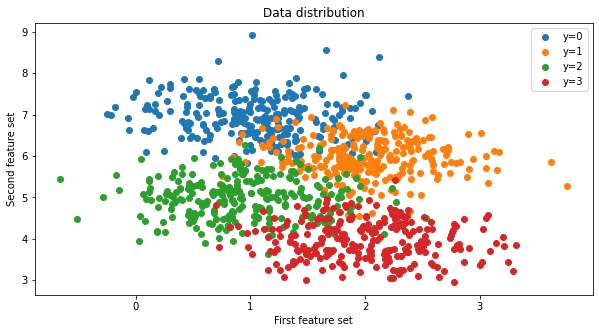

In [10]:
# visualizing the dataset
plt.figure(figsize=(10, 5))
ys = np.unique(y)
for y_ in ys:
  ix_ = np.where(y==y_)
  plt.scatter(x[ix_, 0], x[ix_, 1], label=f'y={y_}')
plt.legend()
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Data distribution')
plt.show()

Splitting the data into **test** and **train** set. Not having any **validation** set because we will not do any `hyper-parameter` tuning for this we will fit models with both the approaches and see what is the difference in decision-boundary to understand what is difference between how these models classify different classes.

In [11]:
# splitting 80% of data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Multiclass logistic regression

Like J guessed one of the extension of this Logistic Regression problem to multiclass problem is using a **one-vs-all** approach which as the name suggests fits a linear model for a class against all the other classes, turning the multiple classes into multiple binary problems. Other extension is using **one-vs-one** not very common as you will have more linear models to fit requiring more data. Another extension is **multinomial** approach where the final the prediction probability of all the classes is 1. The softmax for multinomial regression uses cross-entropy cost function. Whereas **OvR** *composite* model based on multiple binary logistic regressors trains completely independent binary logit classifiers using the logistic regression cost function.

#### OvR

In [12]:
ovr_model = LogisticRegression(multi_class='ovr')
ovr_model.fit(x_train, y_train)

print(f'Training accuracy-score of the model {ovr_model.score(x_train, y_train)}')
print(f'Test accuracy-score of the model {ovr_model.score(x_test, y_test)}')

Training accuracy-score of the model 0.88
Test accuracy-score of the model 0.875


Lets see the confusion matrix for this **OvR** extension of logistic regression model.

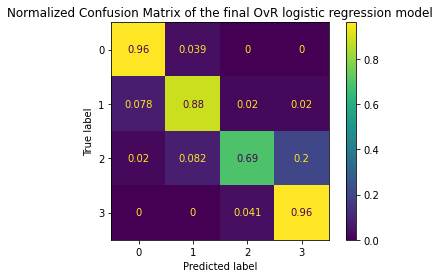

In [13]:
plot_confusion_matrix(ovr_model, x_test, y_test, normalize='true')
plt.title('Normalized Confusion Matrix of the final OvR logistic regression model')
plt.show()

Again we have a **86%** accuracy of the model in the test set.

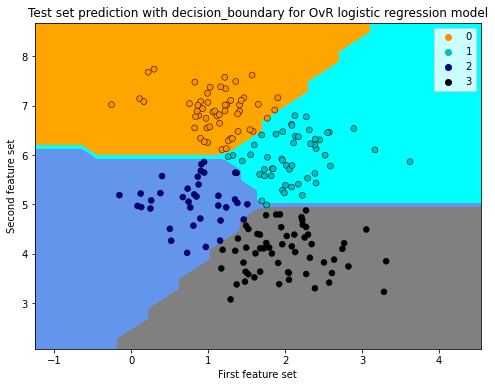

In [14]:
# defining a mesh a predicting on each step in the mesh 

h = 0.2 # step size for mesh grid points
# color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'gray'])
cmap_bold = ['darkorange', 'c', 'darkblue', 'black']

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = ovr_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=ovr_model.predict(x_test),
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("4-Class classification for OvR logistic regression extension")
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Test set prediction with decision_boundary for OvR logistic regression model')
plt.show()

We can see that the model is just a combination of **four** Logistic-regression model. One for each class.

#### Multinomial

In [15]:
multinomial_model = LogisticRegression(multi_class='multinomial')
multinomial_model.fit(x_train, y_train)

print(f'Training accuracy-score of the model {multinomial_model.score(x_train, y_train)}')
print(f'Test accuracy-score of the model {multinomial_model.score(x_test, y_test)}')

Training accuracy-score of the model 0.89125
Test accuracy-score of the model 0.87


Lets see the confusion matrix for this **mutlinomial** extension of logistic regression model.

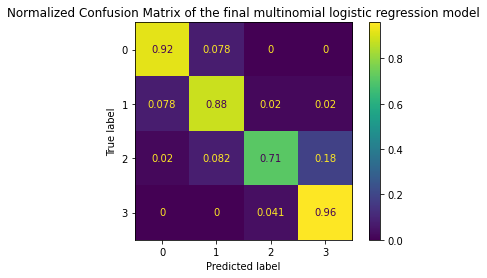

In [16]:
plot_confusion_matrix(multinomial_model, x_test, y_test, normalize='true')
plt.title('Normalized Confusion Matrix of the final multinomial logistic regression model')
plt.show()

Again we have a **86%** accuracy of the model in the test set.

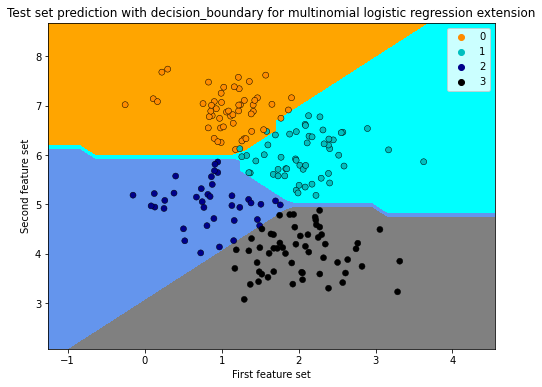

In [17]:
# defining a mesh a predicting on each step in the mesh 

h = 0.2 # step size for mesh grid points
# color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'gray'])
cmap_bold = ['darkorange', 'c', 'darkblue', 'black']

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = multinomial_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=multinomial_model.predict(x_test),
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("4-Class classification for multinomial logistic regression extension")
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Test set prediction with decision_boundary for multinomial logistic regression extension')
plt.show()

As we the models are almost exactly the same what differs is the way that they are implemented in **OvR** different regressors are fit independent to each other. Wheras in **Multinomial** different regressors are all fit together using `cross entropy` cost function.

## Regression

### Linear Regression

Lets generate a dummy data all set this simulation. (1-D for simplicity)

In [18]:
# generating the dataset
x = np.random.rand(1000)*50
y = np.random.rand(1000)*10 + 5*x - 50

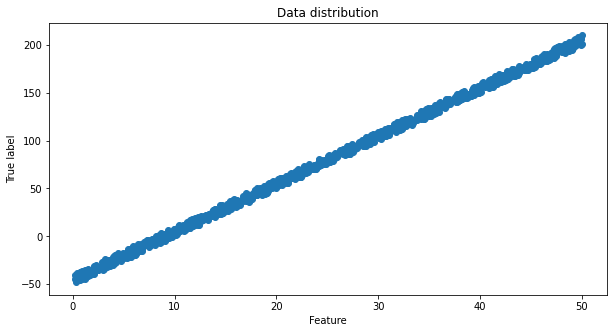

In [19]:
# visualizing the dataset
plt.figure(figsize=(10, 5))
ys = np.unique(y)
plt.scatter(x, y)
plt.xlabel('Feature')
plt.ylabel('True label')
plt.title('Data distribution')
plt.show()

It is evidently visible that we should be fitting a linear model to this dataset as **y** looks to be linearly dependent on the feature **x**.

Splitting the data into **train** and **test** set. Again not having any **validation** set for simplicity.

In [20]:
# splitting 80% of data for training
x_train, x_test, y_train, y_test = train_test_split(x[..., np.newaxis], y, test_size=0.2)

Fitting the model

In [21]:
lin_model = LinearRegression().fit(x_train, y_train)

print(f'Training R2-score of the model {lin_model.score(x_train, y_train)}')
print(f'Test R2-score of the model {lin_model.score(x_test, y_test)}')

Training R2-score of the model 0.9984157329623976
Test R2-score of the model 0.9985857694566609


Checking and comparing the actual and predicted coefficients.

In [22]:
print(f'Predicted equation is y = {lin_model.coef_[0].round(3)}*x + {lin_model.intercept_.round(3)} \n' +\
      'Whereas the actual equation was y = 5*x - 50')

Predicted equation is y = 4.994*x + -44.835 
Whereas the actual equation was y = 5*x - 50


Because of the randomness added y is not exactly linear but we can see that the predicted coefficents are pretty close to the actual coeffients of **y**. 

Let's visualize the performance of the model in the test set.

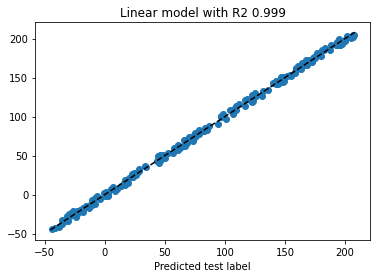

In [23]:
y_pred = lin_model.predict(x_test)

plt.scatter(y_test, y_pred)
plt.plot([min(min(y_test)-1,min(y_pred)-1), max((max(y_test)+1,max(y_pred)+1))],
         [min(min(y_test)-1,min(y_pred)-1), max((max(y_test)+1,max(y_pred)+1))],
         ls='--', color='k')
plt.xlabel('True test label')
plt.xlabel('Predicted test label')
plt.title(f'Linear model with R2 {lin_model.score(x_test, y_test).round(3)}')
plt.show()

It is evidently visible that the prediction are reasonable. The $R^{2}$ of the model is also very good given the best it can be is 1.

### Polynomial Linear Regression

what if the we have a polynomial relation of **y** on **x**. We will have to guess the order of x to keep in argument which becomes a hyperparameter for the model. We already have our x defined we will define y differently.

In [24]:
y = np.random.rand(1000)*10 + 5000*x - 400*x**2 + 8*x**3 + 1000

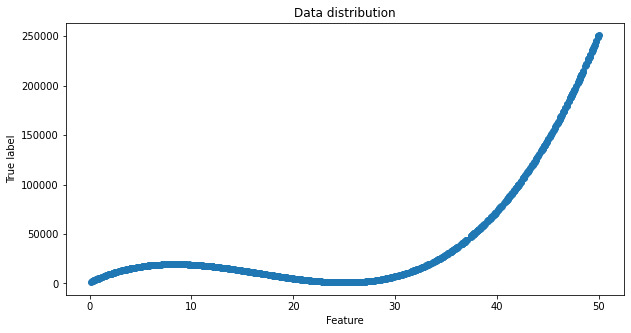

In [25]:
# visualizing the dataset
plt.figure(figsize=(10, 5))
ys = np.unique(y)
plt.scatter(x, y)
plt.xlabel('Feature')
plt.ylabel('True label')
plt.title('Data distribution')
plt.show()

Splitting the dataset into **train**, **test** and **validation** sets. Using validation set to tune the `order of polynomial` our **hyperparameter** for the model.

In [26]:
# splitting 80% of data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# splitting the rest 20% into 10% for validation and 10% for test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

Tuning the hyperparameter

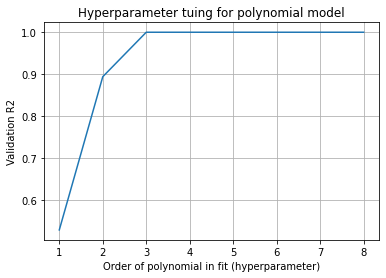

In [27]:
order_ = [1, 2, 3, 4, 5, 6, 7, 8]
val_score = []

for order__ in order_:
  x_train_ = []
  x_val_ = []
  for i in range(1, order__+1):
    x_train_.append(x_train**i)
    x_val_.append(x_val**i)
  x_train_ = np.array(x_train_).T
  x_val_ = np.array(x_val_).T
  model = LinearRegression().fit(x_train_, y_train)
  val_score.append(model.score(x_val_, y_val))

plt.plot(order_, val_score)
plt.xlabel('Order of polynomial in fit (hyperparameter)')
plt.ylabel('Validation R2')
plt.title('Hyperparameter tuing for polynomial model')
plt.grid()
plt.show()

It can be seen that anything above order 3 has a $R^{2}$ of 1, which means its able to fit the data perfectly. Therefore order of the polynomial should be **3** for the model to be least complex and still capturing the pattern in the dataset.

Fitting the final model

In [28]:
x_train_ = []
x_test_ = []
for i in range(1, order__+1):
  x_train_.append(x_train**i)
  x_test_.append(x_test**i)

x_train_ = np.array(x_train_).T
x_test_ = np.array(x_test_).T

In [29]:
poly_model = LinearRegression().fit(x_train_, y_train)

print(f'Training R2-score of the model {poly_model.score(x_train_, y_train)}')
print(f'Test R2-score of the model {poly_model.score(x_test_, y_test)}')

Training R2-score of the model 0.9999999979956791
Test R2-score of the model 0.9999999964525896


Checking and comparing the actual and predicted coefficients.

In [30]:
print(f'Predicted equation is y = {poly_model.coef_[0].round(3)}*x + {poly_model.coef_[1].round(3)}*x^2' +\
      f'+ {poly_model.coef_[2].round(3)}*x^3 + {lin_model.intercept_.round(3)} \n' +\
      'Whereas the actual equation was y = 5000*x - 400*x**2 + 8*x**3 + 1000')

Predicted equation is y = 4999.747*x + -399.89*x^2+ 7.982*x^3 + -44.835 
Whereas the actual equation was y = 5000*x - 400*x**2 + 8*x**3 + 1000


Because of the randomness added y is not exactly linear but we can see that the predicted coefficents are pretty close to the actual coeffients of **y**. 

Let's visualize the performance of the model in the test set.

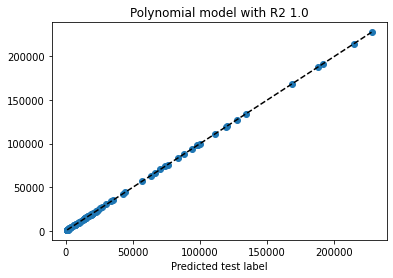

In [31]:
y_pred = poly_model.predict(x_test_)

plt.scatter(y_test, y_pred)
plt.plot([min(min(y_test)-1,min(y_pred)-1), max((max(y_test)+1,max(y_pred)+1))],
         [min(min(y_test)-1,min(y_pred)-1), max((max(y_test)+1,max(y_pred)+1))],
         ls='--', color='k')
plt.xlabel('True test label')
plt.xlabel('Predicted test label')
plt.title(f'Polynomial model with R2 {poly_model.score(x_test_, y_test).round(3)}')
plt.show()

It is evidently visible that the prediction are reasonable. The $R^2$ is the best that it can be.

In [32]:
#END